In [713]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [797]:
# Formating datasets into readable data frames.

train_df = pd.read_csv('/Users/leonardoroman/Desktop/data_science_projects/Titanic_Problem/datasets/train.csv')
test_df = pd.read_csv('/Users/leonardoroman/Desktop/data_science_projects/Titanic_Problem/datasets/test.csv')

In [ ]:
# STEP 1: VARIABLE IDENTIFICATION: identify Predictor (Input) and Target (output) variables

# We need to identify the most relevant variables in our dataset
# in order to make our model more accurate. Target variable may be identified as the "Survived"
# column in our train set.


In [452]:
# Taking a look at the simplified data numerical variables.
# As we can see bellow, age is missing 177 values
train_df.describe()
# train_df.count() # 891 total rows
# test_df.count() # 418 total rows

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [449]:
# To see the different values domains in our train dataset.
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [441]:
# To see the different values domains in our test dataset.
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [442]:
# Lets take a look at sex, age, class and fare. 
# This variables might be key for making predictions.
var = train_df[['Sex','Age','Pclass','Fare']]
var.head(10)

,Sex,Age,Pclass,Fare
0,male,22.0,3,7.2500
1,female,38.0,1,71.2833
2,female,26.0,3,7.9250
3,female,35.0,1,53.1000
4,male,35.0,3,8.0500
5,male,NaN,3,8.4583
6,male,54.0,1,51.8625
7,male,2.0,3,21.0750
8,female,27.0,3,11.1333
9,female,14.0,2,30.0708


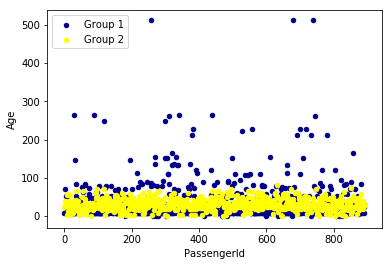

In [413]:
# Observing corelation between PassengerId, Fare and Age.

group1 = train_df.plot.scatter(x = 'PassengerId', y = 'Fare',color='DarkBlue', label='Group 1')
train_df.plot.scatter(x = 'PassengerId', y = 'Age',color='Yellow', label='Group 2', ax = group1)
#train_df.plot.scatter(x = 'PassengerId', y = 'Age', color = 'Yellow', label = 'Group 3', ax = group1)

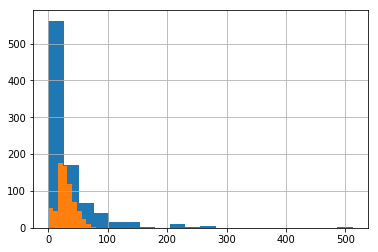

In [414]:
# Age and Fare distributions. 
# WE can see some extrame values in both cases.

train_df['Fare'].hist(bins = 20)
train_df['Age'].hist(bins = 10)

In [418]:
temp1 = train_df['Survived'].value_counts()
temp2 = train_df.pivot_table(values='Sex',index=['Survived'],aggfunc=lambda x: x.map({'female':1,'male':0}).mean())
#temp3 = train_df.pivot_table(values='Survived',index=['Pclass'],aggfunc=lambda x: x.map({1:1,2:0}).mean())

print ('Frequency Table for Survived:')
print (temp1)

print ('\nProbility of surviving by sex:')
print (temp2)

print ('\nProbility of surviving by class:')
#print (temp3)

Frequency Table for Survived:
0    549
1    342
Name: Survived, dtype: int64

Probility of surviving by sex:
               Sex
Survived          
0         0.147541
1         0.681287

Probility of surviving by class:


In [417]:
# Adding survived column to test dataset prdicting that everyone died.

# 1. Add a survived column to test dataset and assign it to a new created dataframe
newTest_df = test_df.assign(Survived = lambda x: np.multiply(x.PassengerId, 0))

# 2. Chose only PassengerId and Survived columns and reasign it.
newTest_df = newTest_df[['PassengerId','Survived']]

# 3. Transform newTest_df dataframe into a new csv dataset, save it and submit it to Kaggle. 
newTest_df.to_csv('/Users/leonardoroman/Desktop/data_science_projects/Titanic_Problem/datasets/theyallperish.csv', index = False)


In [419]:



# SEX PREDICTION MODEL



# Creating different frequency tables.

# Number of male/females in the set
sex_count = train_df['Sex'].value_counts()
print("Sex count: ")
print(sex_count)

# Percentage number of male/female survivers
survived_sex = train_df.groupby('Sex').mean()['Survived']
print("\nSex survival percentage:")
print(survived_sex)

# Frequency table: number of male/female survivors, margins sums up rows and columns
survived_sex = pd.crosstab(train_df['Sex'], train_df['Survived'],margins=True)
survived_sex.columns = ["perished","survived","rowtotal"]
survived_sex.index= ["female","male","coltotal"]
print("\nsurvived_sex by units: ")
print(survived_sex)

# Frequency table: percentage number of male/female by total number of personal
print("\nsurvived_sex by percentage: ")
print(survived_sex/survived_sex.ix['coltotal','rowtotal']) # is divided by 891

# Frequency table: percentage number of male/female survivors by total number of each sex type
print("\nsurvived_sex by percentage: ")
print(survived_sex/survived_sex.ix['coltotal']) # is divided by 549 and 342 respectively

Sex count: 
male      577
female    314
Name: Sex, dtype: int64

Sex survival percentage:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

survived_sex by units: 
          perished  survived  rowtotal
female          81       233       314
male           468       109       577
coltotal       549       342       891

survived_sex by percentage: 
          perished  survived  rowtotal
female    0.090909  0.261504  0.352413
male      0.525253  0.122334  0.647587
coltotal  0.616162  0.383838  1.000000

survived_sex by percentage: 
          perished  survived  rowtotal
female    0.147541  0.681287  0.352413
male      0.852459  0.318713  0.647587
coltotal  1.000000  1.000000  1.000000


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [622]:
# Create a new test model
female_survived_test = test_df.assign(Survived = lambda x: np.multiply(0, 0))

# Query: Select * from female_survived_test where sex == female make Survived = yes
female_survived_test.loc[female_survived_test['Sex']=='female','Survived']=1

female_survived = female_survived_test[['PassengerId','Sex','Survived']]


# Predict that all females had survived.
female_survived_test = female_survived_test[['PassengerId','Survived']]
female_survived_test.to_csv('/Users/leonardoroman/Desktop/data_science_projects/Titanic_Problem/datasets/allfemalesurvived.csv', index = False)
female_survived_test.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [623]:



# AGE PREDICTION MODEL



# Find total count 
temp = train_df['Age'].describe()
print(temp)


count    891.000000
mean      29.001313
std       13.425099
min        0.420000
25%       21.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64



Total number of passangers
 male      577
female    314
Name: Sex, dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Number of passangers younger than 18:  140

Number of survivors:
 0    549
1    342
Name: Survived, dtype: int64

survived_age by units: 
          perished  survived  rowtotal
Adult          474       277       751
Child           75        65       140
coltotal       549       342       891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


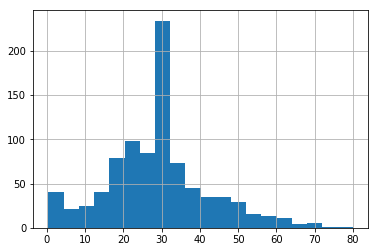

In [624]:
# STEP 2: TREAT FOR MISSING VALUES.

# Total number of passangers: 891 passangers.
passangers = train_df['Sex'].value_counts()
print("\nTotal number of passangers\n",passangers)

# Find missing values. Age missing 177, vabin 687 and Embarked 2 out of 891 passangers.
missing_values = train_df.apply(lambda x: sum(x.isnull()), axis = 0)
print(missing_values)


# Count total number of passangers < 18 yo: 113, 177 are missing then 601 are > 18
count = train_df.loc[train_df['Age'] < 18, 'Sex'].count()
print("\nNumber of passangers younger than 18: ",count)
count = train_df['Survived'].value_counts()
print("\nNumber of survivors:\n",count)


# Create a new column named child into our dummy dataset and make them boolean 0 for Age > 18
train_df['Child'] = 0

# Assign boolean 1 to child for all whom age < 18
train_df.loc[train_df['Age'] < 18, 'Child'] = 1

# Frequency table
survived_age = pd.crosstab(train_df['Child'], train_df['Survived'],margins=True)
survived_age.columns = ["perished","survived","rowtotal"]
survived_age.index= ["Adult","Child","coltotal"]
print("\nsurvived_age by units: ")
print(survived_age)


# Look at age distribution for Outtliers. Keep in mind that Age is missing 177 values.
train_df['Age'].hist(bins = 20)

# Take care of extrame values

train_df.head(5)

In [625]:
# FILLING MISSING VALUES

# Few things: there are 177 missing values for age, there are 113 values less than 18 yo
# which represents 15.8% of the existing values. The Adults and Children ratio is 5:1
# Hence we can say that 150 of 177 are adults older than 18 yo and 27 are less than 18 yo.
# This gives us a 15.2% for passagers less than 18 which is pretty close to the 15.8%
# out of 714 existing values. Another consideration is that children and woman have the
# same probabilities of survival. Therefore we can apply this logic by giving 150 passangers
# a value average of 29.8 years of age and the rest a arbitrary value less than 18 yo.
total = train_df['Age'].count()
print("Total number of values in Age: ",total)
total = train_df['Child'].count()
print("Total number of values in Child: ",total)

train_df['Age'].fillna(29.6, inplace = True, limit = 150)
train_df['Age'].fillna(5.0, inplace = True, limit = 7)
train_df['Age'].fillna(10.0, inplace = True, limit = 10)
train_df['Age'].fillna(15.0, inplace = True, limit = 10)
missing = train_df.apply(lambda x: sum(x.isnull()), axis = 0)
print("MISSING VALUES:\n",missing)

# Count total number of passangers < 18 yo: 113, 177 are missing then 601 are > 18
count = train_df.loc[train_df['Age'] < 18, 'Sex'].count()
print("\nNumber of passangers younger than 18: ",count)

train_df['Child'] = 'no'
# Assign boolean 1 to child for all whom age < 18
train_df.loc[train_df['Age'] < 18, 'Child'] = 'yes'

# Frequency table
survived_age = pd.crosstab(train_df['Child'], train_df['Survived'],margins=True)
survived_age.columns = ["perished","survived","rowtotal"]
survived_age.index= ["Adult","Child","coltotal"]
print("\nsurvived_age by units:\n",survived_age)

train_df.head(5)


Total number of values in Age:  891
Total number of values in Child:  891
MISSING VALUES:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Child            0
dtype: int64

Number of passangers younger than 18:  140

survived_age by units:
           perished  survived  rowtotal
Adult          474       277       751
Child           75        65       140
coltotal       549       342       891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,no
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,no
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,no
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no


       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.421053
std     120.810458    0.494320
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
5,897,1.0
6,898,1.0
7,899,0.0
8,900,1.0
9,901,0.0


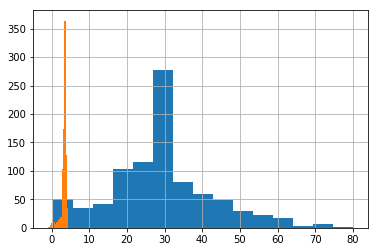

In [626]:
# STEP 3: TREAT FOR OUTTLIERS (EXTRAME VALUES).

# Look at age distribution for Outtliers. Keep in mind that Age is missing 177 values.
train_df['Age'].hist(bins = 15)
# Log values to fix extream values
train_df['Age_log'] = np.log(train_df['Age'])
train_df['Age_log'].hist(bins = 15)
# df['log_fare'] =  np.log(df['Fare'])
 
# Create a new test model: Only woman and children survived
child_female_survived_test = test_df.assign(Survived = lambda x: np.multiply(0, 0))
child_female_survived_test = test_df.assign(Child = lambda x: np.multiply(0, 0))

# Query: 
# line 1: make all females survivors
# line 2: make all passanger less 18 yo as children
# line 3: make all children survivors.
# line 4: make everyone else as perished
child_female_survived_test.loc[child_female_survived_test['Sex'] == 'female','Survived']=1
child_female_survived_test.loc[child_female_survived_test['Age'] < 18,'Child']=1
child_female_survived_test.loc[child_female_survived_test['Child'] == 1,'Survived']=1
child_female_survived_test.loc[(child_female_survived_test['Child']==0) & (child_female_survived_test['Sex']=='male'),'Survived']=0

child_female_survived = child_female_survived_test[['PassengerId','Sex','Child','Survived']]


# New dataframe
child_female_survived_test = child_female_survived_test[['PassengerId','Survived']]
description = child_female_survived_test.describe()
print(description)

# Look for any mising values
child_female_survived_test.apply(lambda x: sum(x.isnull()), axis = 0)
child_female_survived_test.to_csv('/Users/leonardoroman/Desktop/data_science_projects/Titanic_Problem/datasets/childrenfemalesurvived.csv', index = False)
child_female_survived_test.head(100)

In [627]:
# Comparing our data
# female and children survivors 176
# only females survivors 152
# survival number went up only by 24 passangers.
f = female_survived['Survived'].value_counts()
cf = child_female_survived['Survived'].value_counts()
print("only females survivors")
print(f)
print("\nonly females and children survivors")
print(cf)

only females survivors
0    266
1    152
Name: Survived, dtype: int64

only females and children survivors
0.0    242
1.0    176
Name: Survived, dtype: int64


In [637]:



# PCLASS AND FARE MODEL



class_fare_test = train_df


In [684]:
class_fare_test.head(10)

,Fare,Pclass,Sex,Survived,Fare_2
0,7.2500,3,male,0,10-
1,71.2833,1,female,1,30+
2,7.9250,3,female,1,10-
3,53.1000,1,female,1,30+
4,8.0500,3,male,0,10-
5,8.4583,3,male,0,10-
6,51.8625,1,male,0,30+
7,21.0750,3,male,0,20-30
8,11.1333,3,female,1,10-20
9,30.0708,2,female,1,30+


In [639]:
# find missing values
class_fare_test.apply(lambda x: sum(x.isnull()), axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [640]:
# fill missing values
class_fare_test['Age'].fillna(29, inplace = True, limit = 150)
class_fare_test['Age'].fillna(5, inplace = True, limit = 7)
class_fare_test['Age'].fillna(10, inplace = True, limit = 10)
class_fare_test['Age'].fillna(15, inplace = True, limit = 10)
class_fare_test.apply(lambda x: sum(x.isnull()), axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [641]:
# Identify and select relevant variables
class_fare_test = class_fare_test[['Fare','Pclass','Sex','Survived']]
class_fare_test.head(10)

,Fare,Pclass,Sex,Survived
0,7.2500,3,male,0
1,71.2833,1,female,1
2,7.9250,3,female,1
3,53.1000,1,female,1
4,8.0500,3,male,0
5,8.4583,3,male,0
6,51.8625,1,male,0
7,21.0750,3,male,0
8,11.1333,3,female,1
9,30.0708,2,female,1


In [686]:
# categorized fare into 4 ranges
# <$10
# $10-$20
# $20-$30
# >$30

class_fare_test['Fare_2'] = np.NAN
class_fare_test.loc[class_fare_test['Fare'] < 10, 'Fare_2'] = '10-'
class_fare_test.loc[(class_fare_test['Fare'] >= 10)&(class_fare_test['Fare'] < 20), 'Fare_2'] = '10-20'
class_fare_test.loc[(class_fare_test['Fare'] >= 20)&(class_fare_test['Fare'] < 30), 'Fare_2'] = '20-30'
class_fare_test.loc[class_fare_test['Fare'] > 30, 'Fare_2'] = '30+'
x = class_fare_test.loc[(class_fare_test['Sex']=='female')&(class_fare_test['Fare']>=20)&(class_fare_test['Pclass']==3),'Survived']
class_fare_test.head(10)
#print(x)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Fare,Pclass,Sex,Survived,Fare_2
0,7.2500,3,male,0,10-
1,71.2833,1,female,1,30+
2,7.9250,3,female,1,10-
3,53.1000,1,female,1,30+
4,8.0500,3,male,0,10-
5,8.4583,3,male,0,10-
6,51.8625,1,male,0,30+
7,21.0750,3,male,0,20-30
8,11.1333,3,female,1,10-20
9,30.0708,2,female,1,30+


In [651]:
# Frequency table
survived_fare = pd.crosstab(class_fare_test['Fare_2'], class_fare_test['Survived'],margins=True)
survived_fare.columns = ["perished","survived","rowtotal"]
survived_fare.index= ["10-","10-20","20-30","30+","coltotal"]
print("\nsurvived_age by units:\n",survived_fare)
print("\nsurvived_age by percentage:\n",survived_fare/survived_fare.ix["coltotal"])


survived_age by units:
           perished  survived  rowtotal
10-            269        67       336
10-20          103        76       179
20-30           78        58       136
30+             98       136       234
coltotal       548       337       885

survived_age by percentage:
           perished  survived  rowtotal
10-       0.490876  0.198813  0.379661
10-20     0.187956  0.225519  0.202260
20-30     0.142336  0.172107  0.153672
30+       0.178832  0.403561  0.264407
coltotal  1.000000  1.000000  1.000000


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [685]:
# Create the prediction model

female_fare_test = test_df.assign(Survived = lambda x: np.multiply(0,0))
female_fare_test['Survived'] = 0
female_fare_test.loc[female_fare_test['Sex'] == 'female', 'Survived'] = 1
female_fare_test.loc[(female_fare_test['Sex'] == 'female')&(female_fare_test['Pclass'] == 3)&(female_fare_test['Fare']>=20),'Survived'] = 0
female_fare_test = female_fare_test[['PassengerId','Survived']]
female_fare_test.to_csv('/Users/leonardoroman/Desktop/data_science_projects/Titanic_Problem/datasets/female_fare_survived.csv', index = False)

In [798]:



# DECISION TREE MODEL




from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

train = train_df
test = test_df

In [866]:
# 1. FIND AND FILL MISSING VALUES
x = train.apply(lambda x: sum(x.isnull()), axis = 0)
print(x)
train['Age'].fillna(29, inplace = True, limit = 150)
train['Age'].fillna(5, inplace = True, limit = 7)
train['Age'].fillna(10, inplace = True, limit = 10)
train['Age'].fillna(15, inplace = True, limit = 10)
train['Embarked'].fillna('S', inplace = True)
train['Cabin'].fillna('EB', inplace = True)
x = train.apply(lambda x: sum(x.isnull()), axis = 0)
print(x)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [805]:
# TRANSFORMIN VARIABLES INTO NUMERIC VALUES BY ENCODING

from sklearn.preprocessing import LabelEncoder


var_mod = ['Sex','Name','Ticket','Embarked','Cabin']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
train.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Cabin            int64
Embarked         int64
dtype: object

In [869]:


# BUILD TREE MODEL AND DATA VISUALIZATION


import graphviz 
import pydotplus
from IPython.display import Image
from io import StringIO

from sklearn.cross_validation import train_test_split
from sklearn import tree

predictors = train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
target = train['Survived']

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, target, test_size=.4)

#Build model on training data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(pred_train,tar_train)

predictions=clf.predict(pred_test)


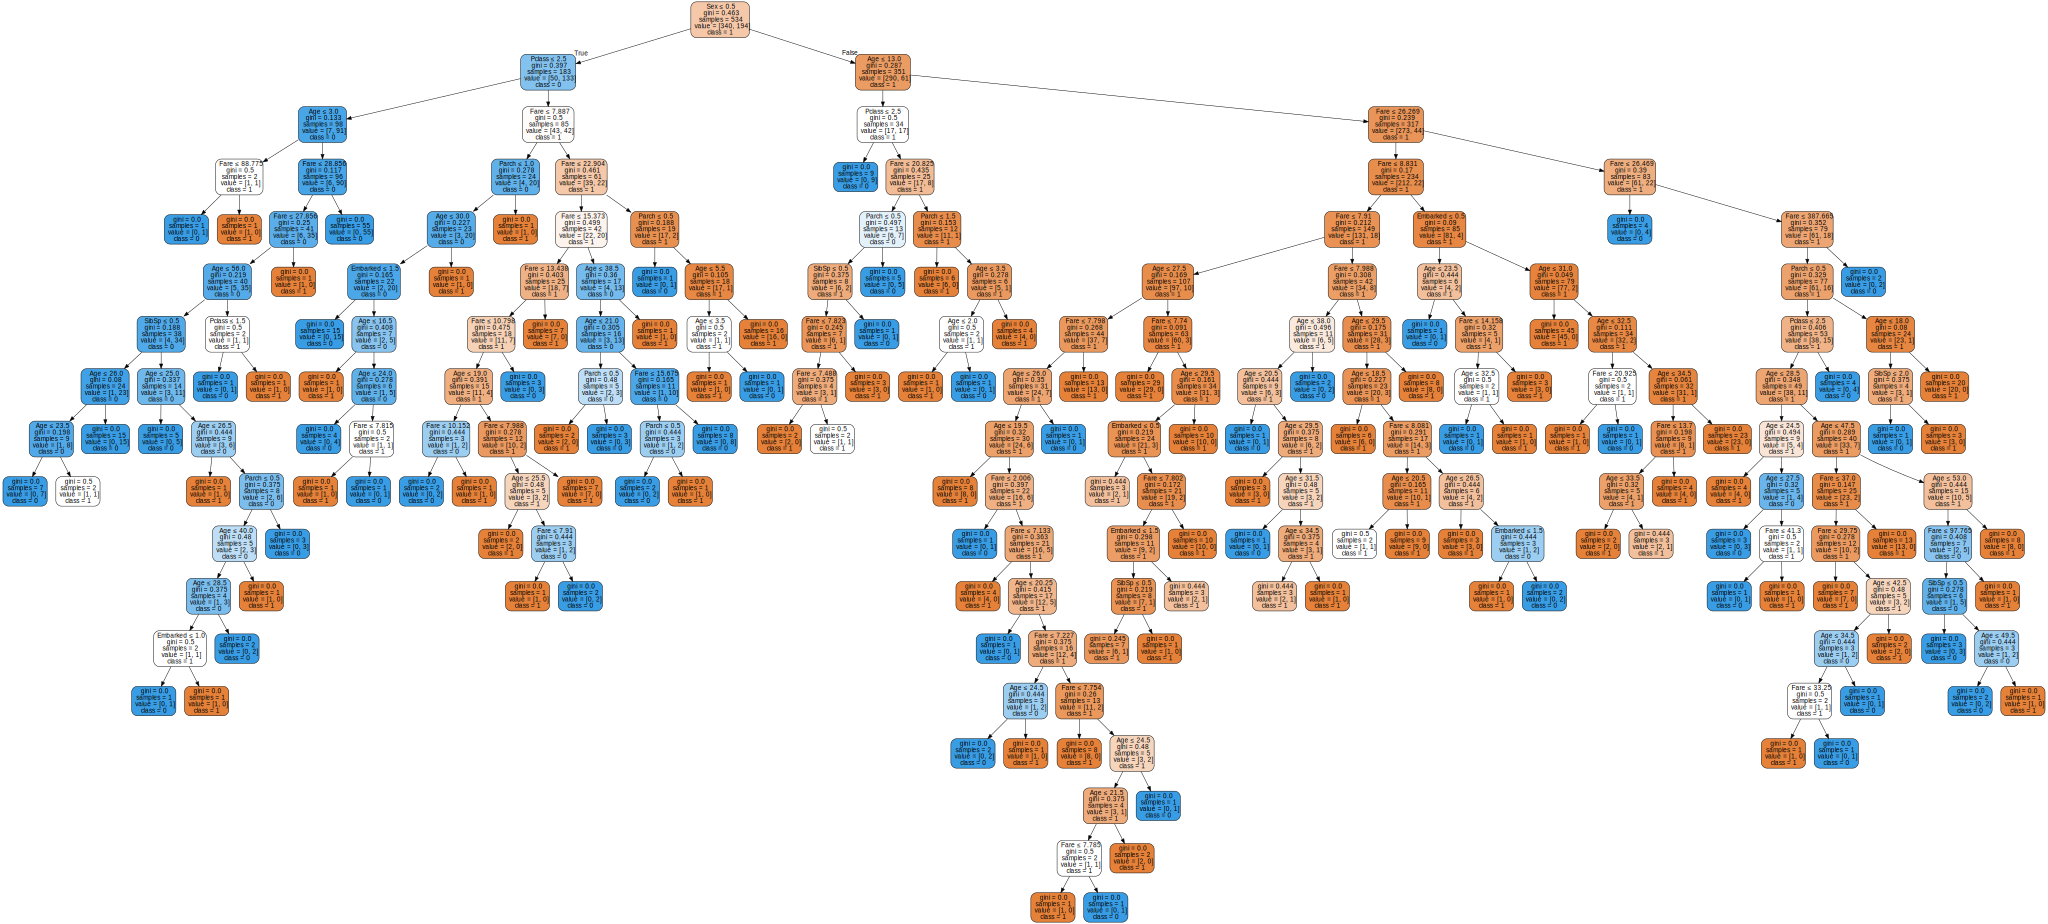

In [855]:


# FULL TREE VISUALIZATION

out = StringIO()
#dot_data = tree.export_graphviz(clf, out_file=out) 
#graph = graphviz.Source(dot_data) 
#graph.render("train") 

fit = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'],  
                         class_names=['1','0'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
 
graph = graphviz.Source(fit)  
graph

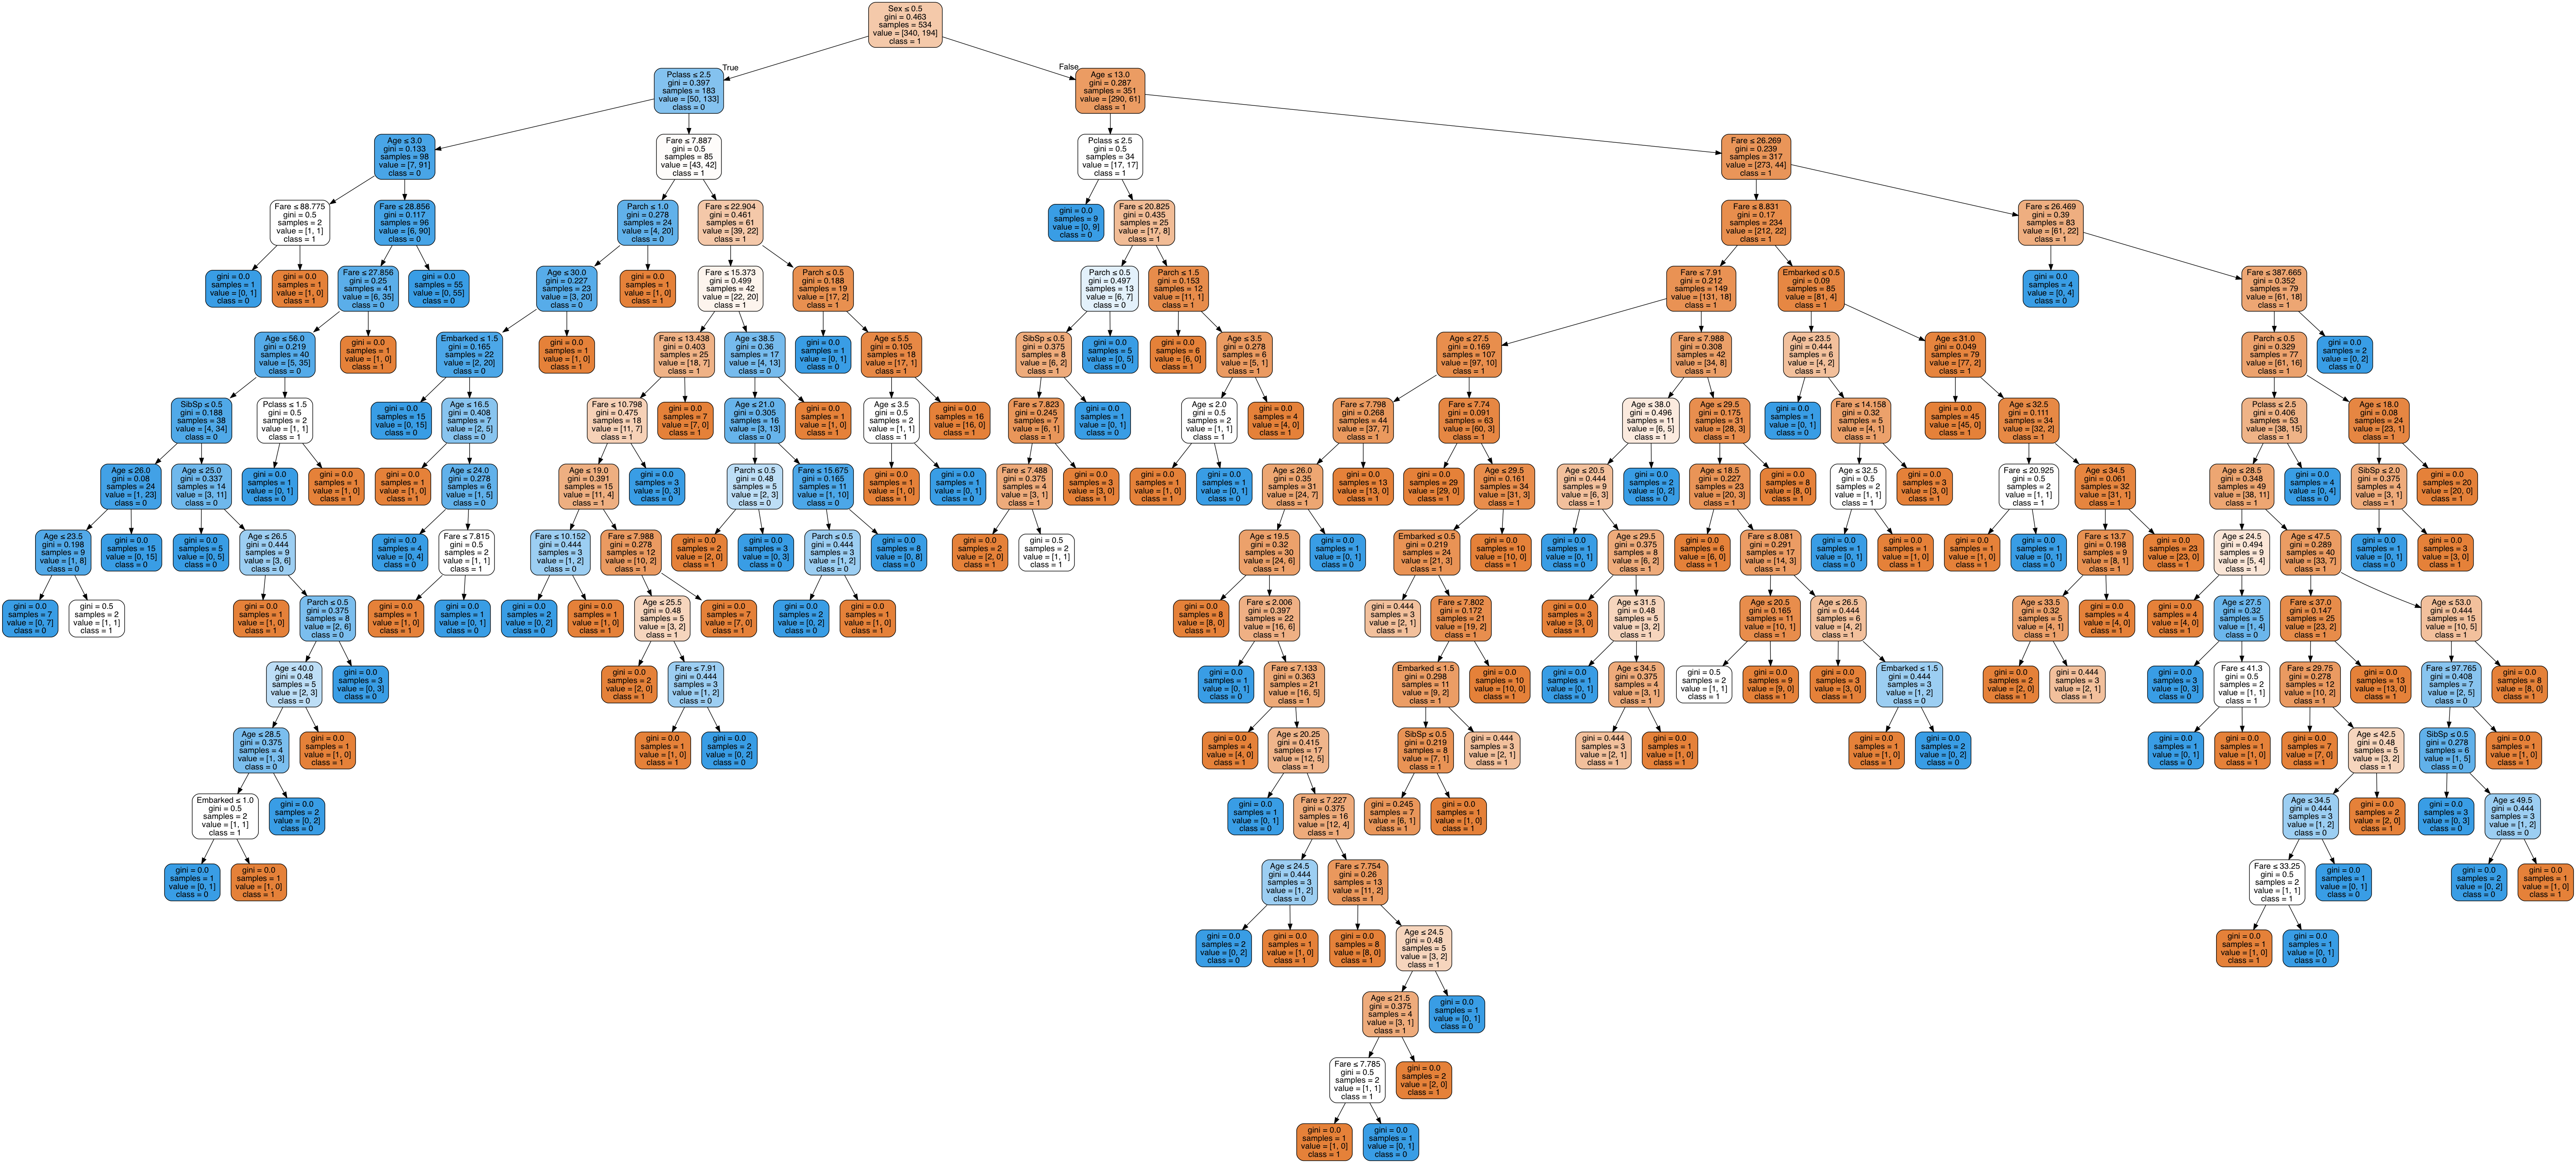

In [856]:
# Full image case
fit = tree.export_graphviz(clf, out_file=out, 
                         feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'],  
                         class_names=['1','0'],  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png()) 

In [860]:
# Generic function for making a classification model and accessing performance:
# models = regression model, decisionTrees, randomForests
# data = entire dataset "train dataframe"
# predictors = variables of interest defined by coder: i.e. "Sex,Age...etc".
# outcome = target defined by coder to compare with: i.e. with " Survided "

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [862]:
# PREDICT OUTCOME

# CASE 1: Using Regression Model

model = LogisticRegression()

# variables_for_prediction
predictor_var = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

# variable_of_interest
outcome_var = ['Survived']

# Method format: fun_name(ml_model, dataframe, variables_for_prediction, variable_of_interest)
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.359%
Cross-Validation Score : 79.124%


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [863]:
# PREDICT OUTCOME

# CASE 2: Using DecisionTreeClassifier Model

model = DecisionTreeClassifier()

# variables_for_prediction
predictor_var = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

# variable_of_interest
outcome_var = ['Survived']

# Method format: fun_name(ml_model, dataframe, variables_for_prediction, variable_of_interest)
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 97.980%
Cross-Validation Score : 75.649%


In [864]:
# PREDICT OUTCOME

# CASE 3: Using RandomForestClassifier Model

model = RandomForestClassifier(n_estimators=100)

# variables_for_prediction
predictor_var = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

# variable_of_interest
outcome_var = ['Survived']

# Method format: fun_name(ml_model, dataframe, variables_for_prediction, variable_of_interest)
classification_model(model, train,predictor_var,outcome_var)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Accuracy : 97.980%


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed whe

Cross-Validation Score : 80.024%


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [865]:

# PREDICT OUTCOME

# CASE 3.B: Using RandomForestClassifier Model

model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)

# variables_for_prediction
predictor_var = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

# variable_of_interest
outcome_var = ['Survived']

# Method format: fun_name(ml_model, dataframe, variables_for_prediction, variable_of_interest)
classification_model(model, train,predictor_var,outcome_var)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A co

Accuracy : 84.736%
Cross-Validation Score : 80.588%


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
# STEP 4: FEATURE ENGINEER.